# introduction
In this assignment I will present an analysis of the rain event data of the city of Santa Barbara (California) in 2020. The city is located on the west coast of the United States to the Pacific coast (34.423 °, -119.717 °) and the Drainage area is 6.60 square miles. 

Precipitation and streamflow data were taken from two different stations 3 km at the same watershade so that they can be treated as reflecting the same reality and conditions.
The **climate** of Santa Barbara is [sub-tropical](https://www.climatestotravel.com/climate/united-states/santa-barbara), with very mild, relatively rainy winters and quite warm, sunny summers.
The [average amount of precipitation](https://www.climatestotravel.com/climate/united-states/santa-barbara) is 475 mm per year. 

### Santa Barbara map
![santa_barbara.PNG](Santa_Barbara_map.PNG)

In the attached map you can see the **height differences** in the Santa Barbara watershed. From the picture you can see that the city is close to the sea in a relatively flat area. But around the city there are very high mountains that can greatly affect the amount of flow of streams in the regional watershed following the steep slopes:

[sourse](https://en-gb.topographic-map.com/maps/kyq3/Santa-Barbara-County/)

![santa_barbara.PNG](elevation_map_SantaBarbara.PNG) ![colorbar.PNG](elevation_colorbar.PNG)


The **soil texture** is a very important variable because it greatly affects the initial moisture content of the soil, the inflirtation of water into the soil and the flow in streams.The soil texture in Santa Barbara's watershed varies greatly and is not uniform. The proximity to the sea and the mountains creates a large variety of soils in a relatively small area: near the sea there are sandy soils and below the mountains there are clayey soils. [In the attached maps](https://databasin.org/maps/new/#datasets=17413fdc803345e8a8042196a51ded15) you can see the percentage of sand, clay and silt in the basin we will deal with:

![sand.PNG](sand.PNG) ![silt.PNG](Silt.PNG) ![clay.PNG](clay.PNG) 

The **land cover** in Santa Barbara is for the most part urban. There is a lot of asphalt and private houses but there is also a large area of gardens in detached houses and bare ground around the city which can allow rainwater to seep in. In addition, the entire city is surrounded by open areas that can cause water to seep into the ground but following the steep slopes also create surface runoff. There is a lot of vegetation on the mountains that can inhibit surface runoff and cause water to seep / be consumed by plants / evaporate.
The following map shows the land cover and all the watershade we will be dealing with:
The source of the image is from a satellite image [sentinel 2](https://apps.sentinel-hub.com/eo-browser/?zoom=12&lat=34.45123&lng=-119.81689&themeId=URBAN&visualizationUrl=https%3A%2F%2Fservices.sentinel-hub.com%2Fogc%2Fwms%2Fbf6e668a-8214-44f3-9a3d-8ec3976d58c9&datasetId=S2L2A&fromTime=2021-05-26T00%3A00%3A00.000Z&toTime=2021-05-26T23%3A59%3A59.999Z&layerId=3_URBAN-CLASSIFIED) in 2020. Some bands show us the vegetation better and some the urban. This is a good way to get a snapshot of ground cover:

![watershade](sattlite_cover.PNG) ![watershade_lagend](sattlite_colorbar.PNG)

The following image is from the Santa Barbara City Hall [website](https://www.santabarbaraca.gov/civicax/filebank/blobdload.aspx?BlobID=16659). It describes the points where rainwater drainage systems are installed. From the picture you can see that the city has an array of rainwater infiltration so you can expect a large amount of rain to seep into the ground and not eventually reach the flow of streams **in the immediate time frame**

![watershade](system_biuv.PNG)


### 1. importing and orgenizing the data
first let's import all the libraries we will need to use during the data analysis and import our data from the stations:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from calendar import month_abbr
from functools import reduce
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import urllib.request
from ipywidgets import *
import matplotlib.dates as mdates

let's import the data of pacipitation in Santa barbara in 2020 and present it in graph:

In [2]:
# importimg and organizing the data:

data_file = "Santa_Barbara_2020_Percipitation.txt"
df_perc = pd.read_csv(data_file,                   #perc = percipitation
                 header=None,                      # no headers needed, we'll do that later
                 delim_whitespace=True,            # blank spaces separate between columns
                 na_values=["-99.000", "-9999.0"]  # substitute these values for missing (NaN) values
                )
headers = pd.read_csv("HEADERS.txt",    # load headers file
                      header=1,                    # skip the first [0] line
                      delim_whitespace=True
                     )
df_perc.columns = headers.columns                       # rename df columns with headers columns
# LST = local standard time
df_perc["LST_TIME"] = [f"{x:04d}" for x in df_perc["LST_TIME"]]  # time needs padding of zeros, then convert to string
df_perc['LST_DATE'] = df_perc['LST_DATE'].astype(str)            # convert date into string
df_perc['datetime'] = df_perc['LST_DATE'] + ' ' + df_perc['LST_TIME'] # combine date+time into datetime
df_perc['datetime'] = pd.to_datetime(df_perc['datetime'])        # interpret datetime
df_perc = df_perc.set_index('datetime')# make datetime the index

# Now we'll just leave the precipitation column, the only one relevant to our discussion:
df_perc = df_perc['PRECIPITATION'].to_frame()
df_perc

,PRECIPITATION
datetime,
2019-12-31 16:05:00,0.0
2019-12-31 16:10:00,0.0
2019-12-31 16:15:00,0.0
2019-12-31 16:20:00,0.0
2019-12-31 16:25:00,0.0
...,...
2020-12-31 15:40:00,0.0
2020-12-31 15:45:00,0.0
2020-12-31 15:50:00,0.0


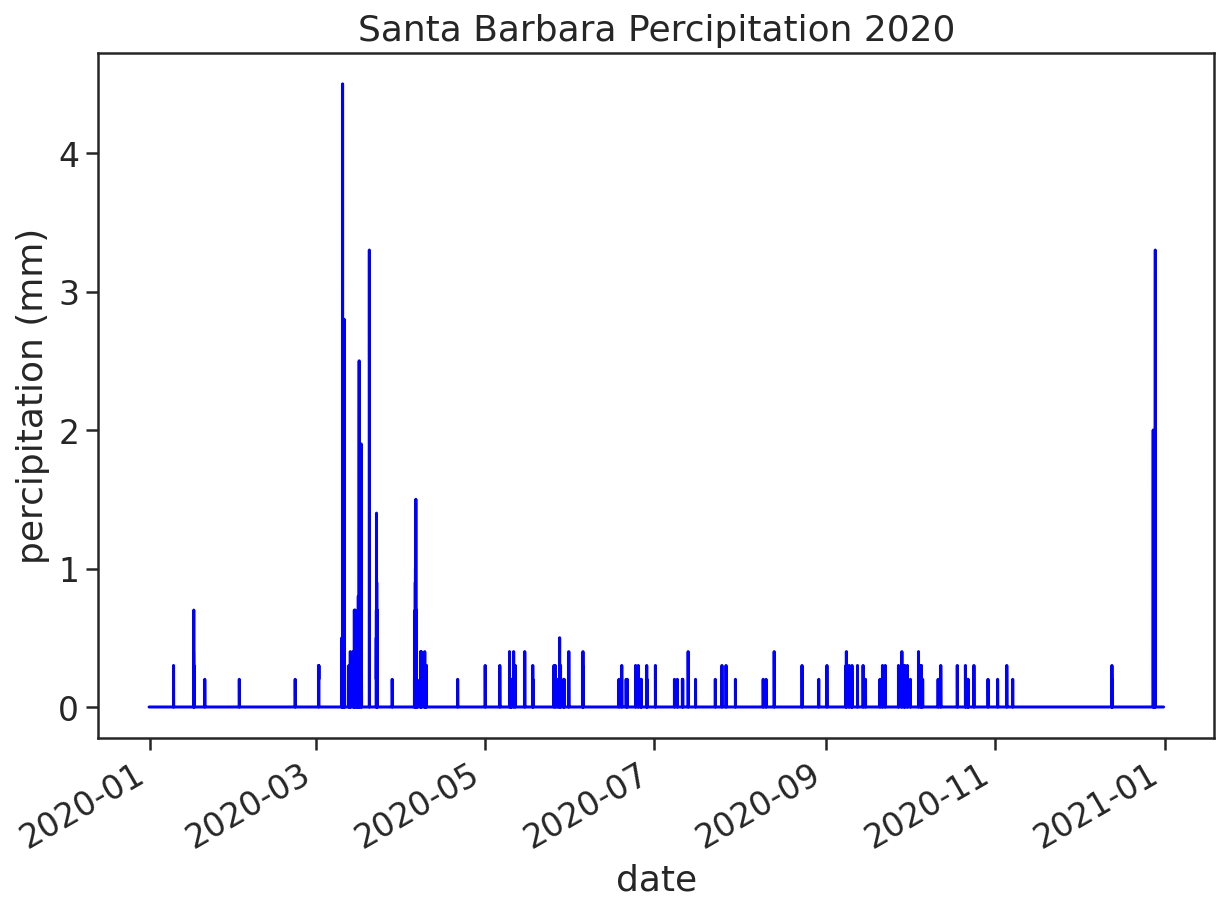

In [3]:
# now we can make the graph:

# creates figure (the canvas) and the axis (rectangle where the plot sits)
fig, ax = plt.subplots(1, figsize=(10,7))
# two line plots
ax.plot(df_perc, color="blue" )
# axes labels and figure title
ax.set_xlabel('date')
ax.set_ylabel('percipitation (mm)')
ax.set_title('Santa Barbara Percipitation 2020')
# some ticks adjustments
plt.gcf().autofmt_xdate()  # makes slated dates

We will now import the discharge data:

In [4]:
data_file = "santa_barbara_streamflow.txt"
df_q_2020 = pd.read_csv(data_file,
                        header=31,                      # no headers needed, we'll do that later
                        delim_whitespace=True,            # blank spaces separate between columns
                        na_values=["Bkw"]  # substitute these values for missing (NaN) values
                )
df_q_2020.columns = ['agency_cd', 'site_no','datetime','tz_cd','EDT','discharge','code']                       # rename df columns with headers columns
df_q_2020['date_and_time'] = df_q_2020['datetime'] + ' ' + df_q_2020['tz_cd'] # combine date+time into datetime
df_q_2020['date_and_time'] = pd.to_datetime(df_q_2020['date_and_time'])        # interpret datetime
df_q_2020 = df_q_2020.set_index('date_and_time')                          # make datetime the index
df_q_2020['discharge'] = df_q_2020['discharge'].astype(float)
df_q_2020['discharge'] = df_q_2020['discharge'] * 0.0283168 # convert cubic feet to m3
# df_q_2020        #uncomment to see the full DataFrame

Now we have an organized database of precipitation and stream flow in 2020 in Santa Barbara!

### 2. Calculating the rate of effective water input (p*) and the event flow rate (q*).

In order to evaluate the rain event it is important to know the following parameters:

![terms](terms.PNG)

the rate of effective water input (p*) will give us information on the amount of rain that eventually reaches the stream flow. This information will also help us understand how much water **does not** reach the stream flow because they inflirtating to the ground due to all the factors we have detailed in the introduction or they are consumed by plants, evaporators, etc..

The calculation of (q*) will help us to separate base flow stream and the flow that came as a result of the rain event.

This parameters can help us to understand our system and her reaction to this rain event.

From the graph of precipitation it can be seen that in March there was a continuous rain event with significant rainfall data. We will select this event to test our system. For this purpose, we will select the relevant data and present him in the graph:

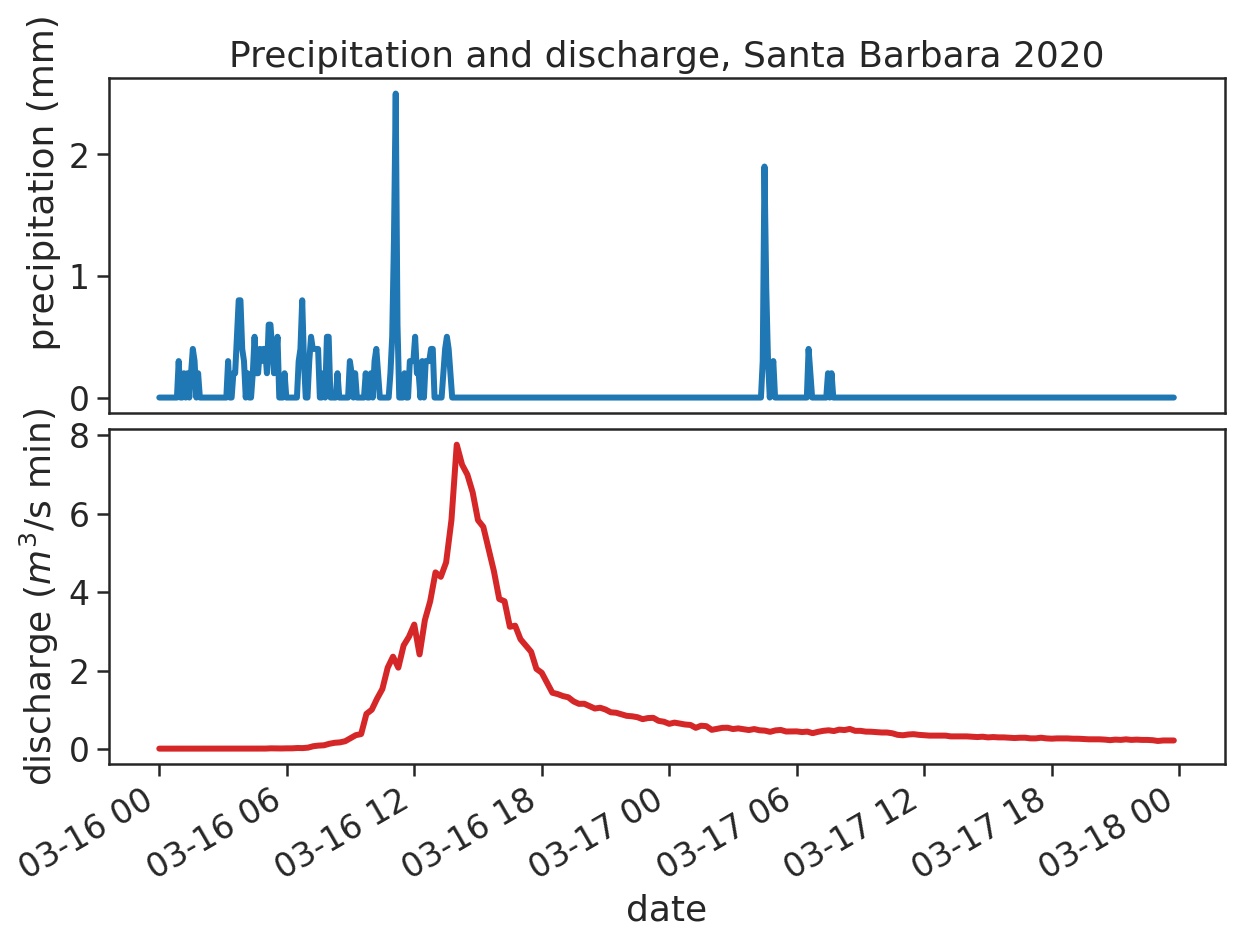

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7))
fig.subplots_adjust(hspace=0.05)

start = "2020-03-16"
end = "2020-03-17"
ax1.plot(df_perc[start:end]['PRECIPITATION'],color="tab:blue", lw=3)
ax2.plot(df_q_2020[start:end]['discharge'], color="tab:red", lw=3)

ax1.set(xticks=[],
        ylabel="           precipitation (mm)",
        title="Precipitation and discharge, Santa Barbara 2020")
ax2.set(xlabel="date",
        ylabel=r"discharge ($m^3$/s min)")

plt.gcf().autofmt_xdate()  # makes slated dates

The delay in the discharge graph makes a lot of sense because it takes some time for the runoff to start but the reaction seems to be proportional to the amount of rain
We will now create a more accurate graph that will contain the exact date and time of the rain event. In addition, we will convert the units to SI units and calculate as well total rainfall $P^*$ and total discharge $Q^*$, in m$^3$.

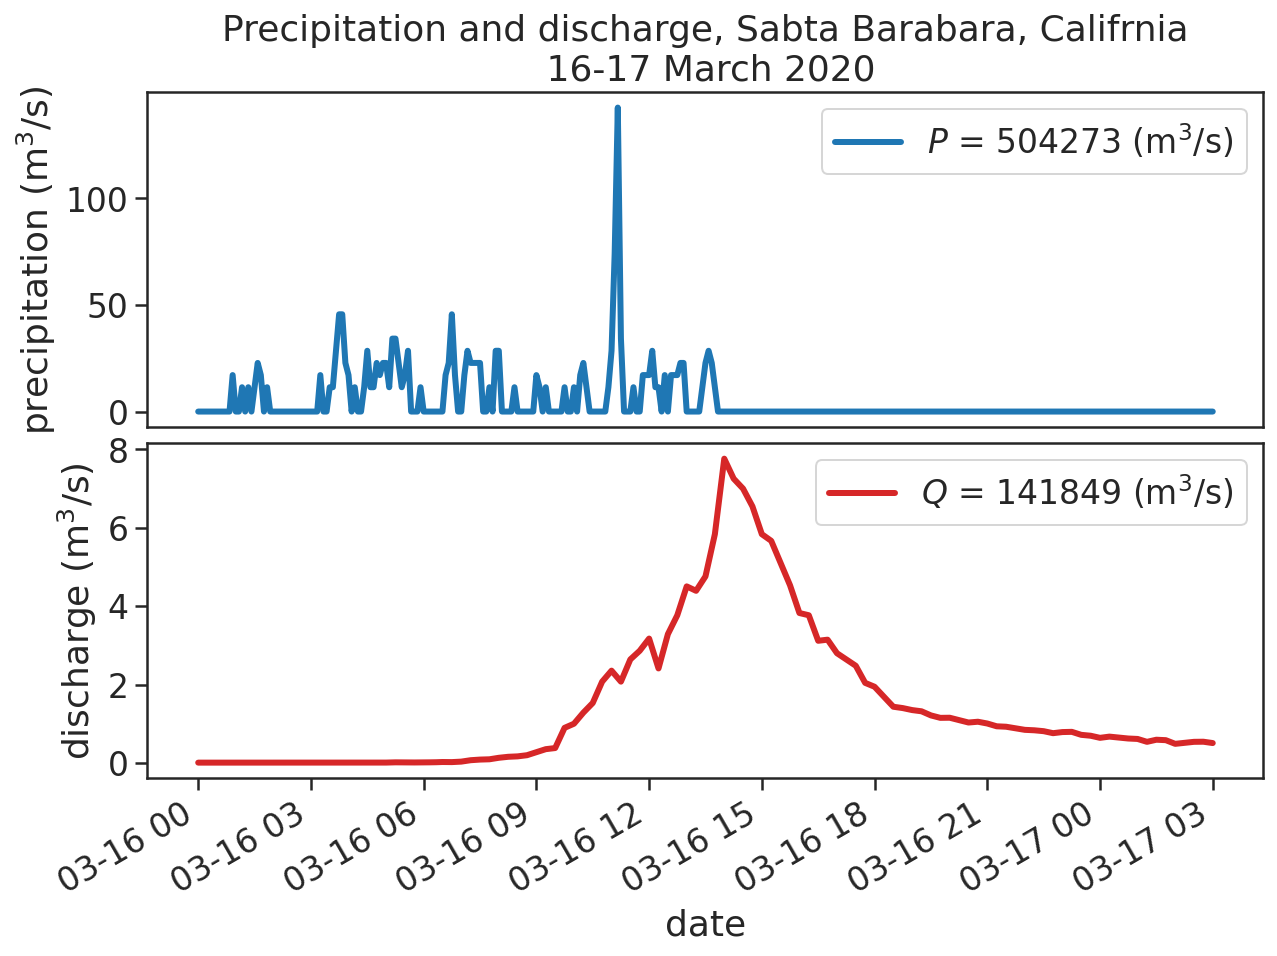

In [6]:
# Drainage area: 6.6 square miles
area = 6.6 / 0.00000038610  # squared miles to squared meters

#define the specific dates and hours
start = "2020-03-16 00:00:00"
end = "2020-03-17 03:00:00"

#new data frame with the 2 parameters by 5 minutes:
df_unit = df_perc[start:end]["PRECIPITATION"].to_frame() #date
df_unit.columns = ['PRECIPITATION'] #percipitaion colunm
df_unit['discharge'] = df_q_2020[start:end]["discharge"].to_frame() #discharge colunm
df_unit = df_unit.interpolate(method='time') #interpolate to make discharge in 5min intervals like the precipitation

#converting the units
df_unit['PRECIPITATION'] = df_unit['PRECIPITATION'].values * area / 1000  # mm to m3 in the whole watershed
df_unit['PRECIPITATION'] = df_unit['PRECIPITATION'] / 60 / 5 # convert m3 per 5 min to m3/s
#we dont need to convert the units of discharge because the data already in SI units

# print(df_unit)      #uncomment to see the new dataframe

#calculating P & Q
P = df_unit['PRECIPITATION'].sum() * 60 * 5 #convert m3/s into m3
Q = df_unit['discharge'].sum() * 60 * 5 #convert m3/s into m3

#creating a new graph
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7))
fig.subplots_adjust(hspace=0.05)
ax1.plot(df_unit['PRECIPITATION'],color="tab:blue", lw=3, label = "$P$ = 504273 (m$^3$/s)")
ax2.plot(df_unit['discharge'], color="tab:red", lw=3, label = "$Q$ = 141849 (m$^3$/s)")

ax1.set(xticks=[],
        ylabel=r"precipitation (m$^3$/s)",
        title="Precipitation and discharge, Sabta Barabara, Califrnia\n 16-17 March 2020")
ax2.set(xlabel="date",
        ylabel=r"discharge (m$^3$/s)")
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

plt.gcf().autofmt_xdate()  # makes slated dates

Now we want to separate the base flow (which is not related to the rain event) from the effective flow that follows the rain event. Recall that the effective flow rate is q* and the total amount is Q*

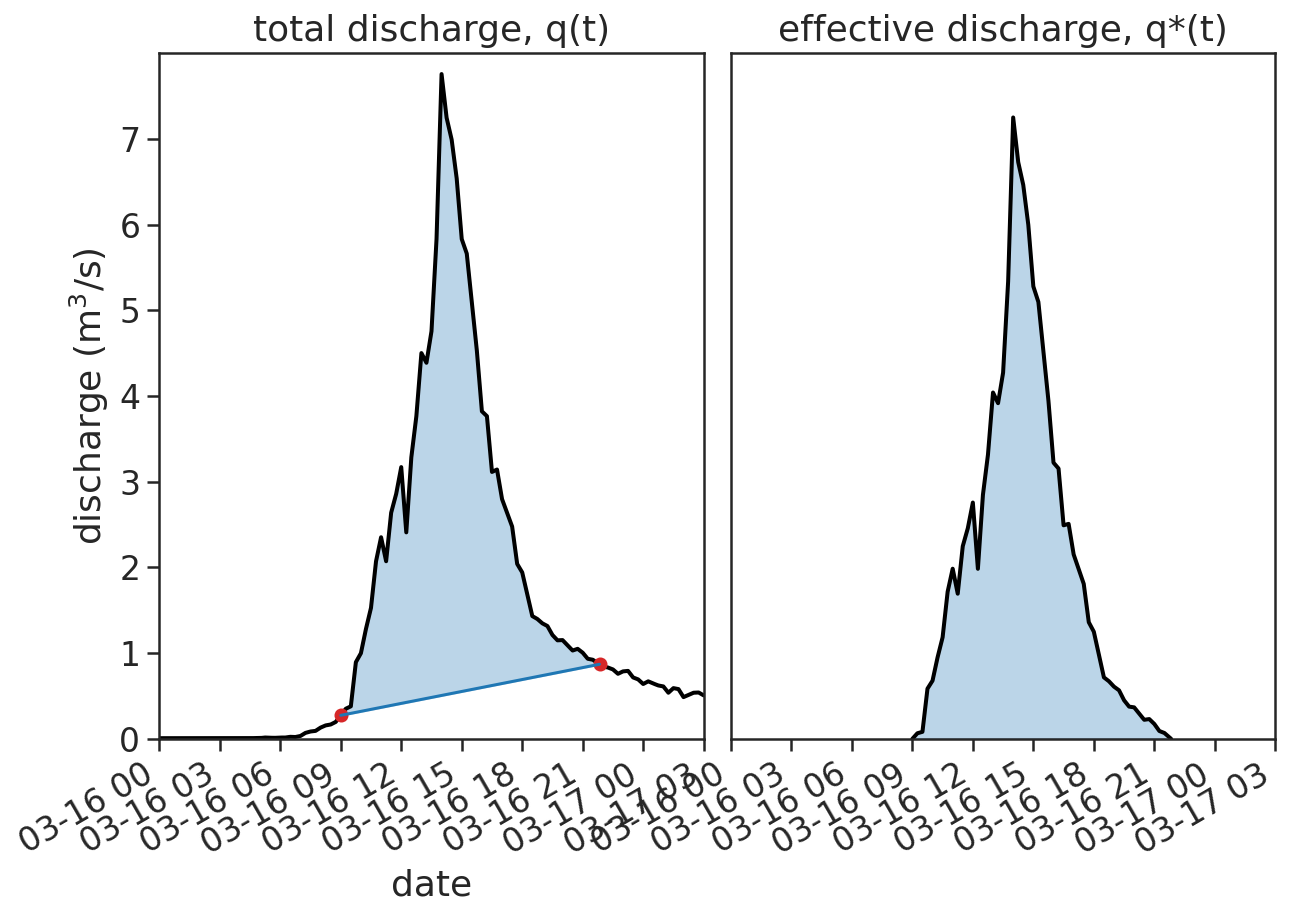

In [11]:
from matplotlib.dates import HourLocator, DateFormatter
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,7))
fig.subplots_adjust(wspace=0.05)

# choosing the 2 points of time that between them we see the reaction to the the rain event:
ax1.plot(df_unit['discharge'], color="black", lw=2)
point1 = pd.to_datetime("2020-03-16 09:00:00")
point2 = pd.to_datetime("2020-03-16 21:50:00")
two_points = df_unit.loc[[point1, point2]]['discharge'].to_frame()
ax1.plot(two_points, 'o', color="tab:red")

# creating the line between the 2 points
df_linear = (two_points.resample("5min") #resample
                .interpolate(method='time') #interpolate by time
            )
ax1.plot(df_linear, color="tab:blue")

df_between_2_points = df_unit.loc[df_linear.index]
ax1.fill_between(df_between_2_points.index, df_between_2_points['discharge'],
                 y2=df_linear['discharge'],
                 color="tab:blue", alpha=0.3)



#defining qstar - the delta between the base flow to the flow from rain:
qstar = df_unit.loc[df_linear.index]['discharge'] - df_linear['discharge'] # we want the data just between the 2 points
Qstar = qstar.sum() * 60 * 5 #the total effective discharge

# plot of the effective discharge, q*
ax2.plot(qstar, color="black", lw=2)
ax2.fill_between(qstar.index, qstar,
                 y2=0.0,
                 color="tab:blue", alpha=0.3)

ax1.set(xlim=[df_unit.index[0],
              df_unit.index[-1]],
        xlabel=r"date",
        ylabel=r"discharge (m$^3$/s)",
        ylim=[0,8],
        yticks=[0,1,2,3,4,5,6,7],
        title="total discharge, q(t)")
ax2.set(yticks=[],
        ylim=[0, 8],
        xlim=[df_unit.index[0],
              df_unit.index[-1]],
        title="effective discharge, q*(t)"
       )

plt.gcf().autofmt_xdate()  # makes slated dates

Now we can calculate p*, using

$$
P^* = Q^*
$$

One of the simplest methods is to multiply $p(t)$ by a fixed constant (<1) to obtain $p^*$, so that the equation above holds true.

There are more methods that can be seen in the link [here](https://yairmau.com/jupyter/2020/02/01/streamflow-lecture.html). This is the simplest method but probably the least accurate. It is assumed that there is always a constant percentage of rain that becomes discharge. In practice the reality is probably more complex (Because data such as soil depth, initial moisture content, soil type, etc. must be taken into account). For the purpose of our discussion we will use this simple model

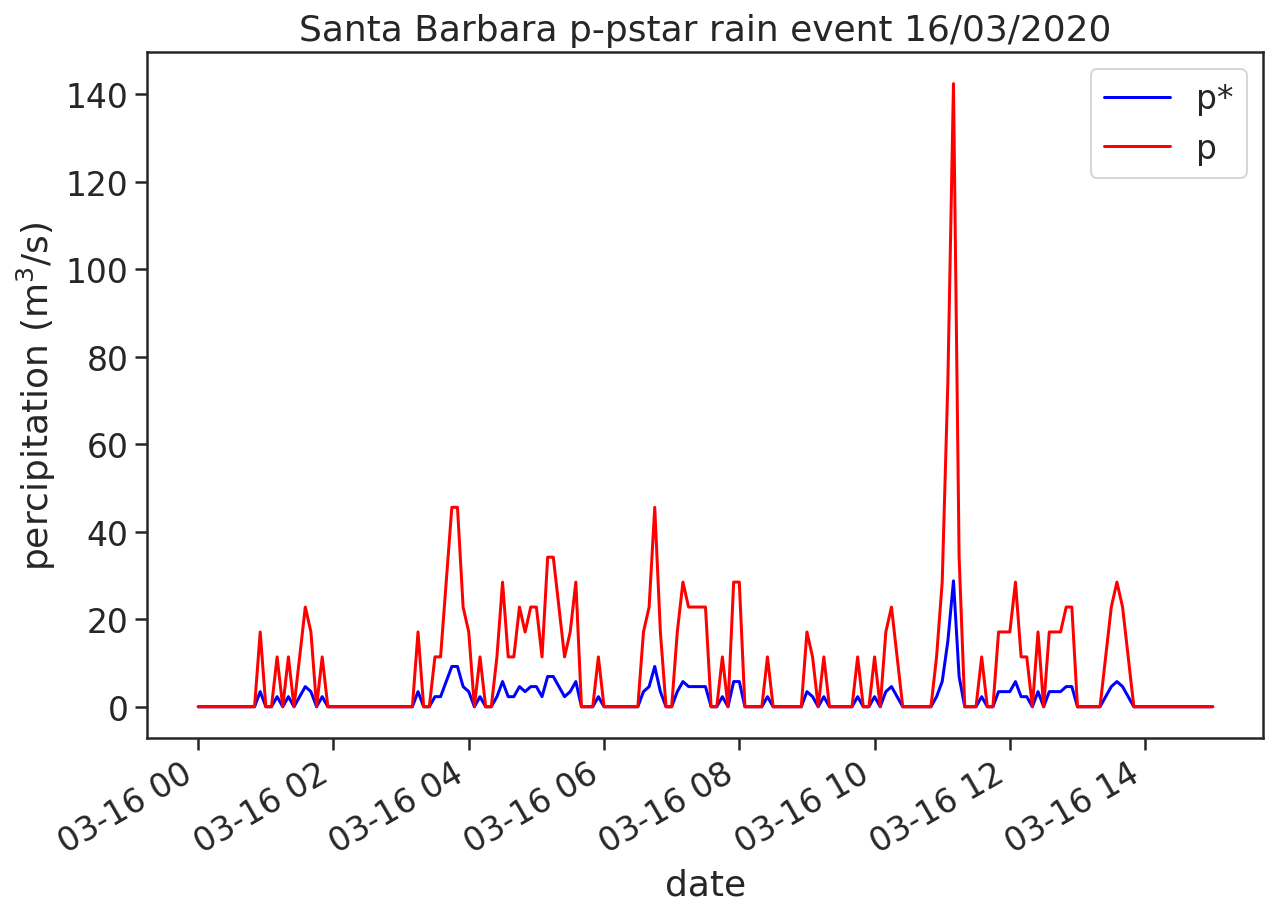

In [12]:
ratio = Qstar/ P #
pstar = df_unit['PRECIPITATION'] * ratio
df_unit['pstar'] = pstar
Pstar = pstar.sum() * 5 * 60
#print(Qstar,Pstar)

# creates figure (the canvas) and the axis (rectangle where the plot sits)
fig, ax = plt.subplots(1, figsize=(10,7))
# two line plots
start, end = "2020-03-16 00:00:00","2020-03-16 15:00:00" 
ax.plot(df_unit[start:end]['pstar'], color="blue", label = "p*" )
ax.plot(df_unit[start:end]['PRECIPITATION'], color="red", label = "p" )
# axes labels and figure title
ax.set_xlabel('date')
ax.set_ylabel('percipitation (m$^3$/s)')
ax.set_title('Santa Barbara p-pstar rain event 16/03/2020')
ax.legend(loc='upper right')
# some ticks adjustments
plt.gcf().autofmt_xdate()  # makes slated dates

We will now summarize the data we found in the table. In the final discussion we will analyze the meaning of the results

|Parameter  | value (m$^3$/s) |
| --- | --- |
|$ P $  |504273 |
|$ P^*$ | 101862|
|$ Q$  | 141849 |
|$ Q^*$   | 101862 |

### 2. Calculating importent time parameters

Now lets calcultes some parameters of time. They will help us to understand our system and the reaction of her to a rain event. Although it is necessary to know additional parameters (initial moisture content for example) these times will help us to generally characterize the watershade of Santa Barbara:

1. The centroid ($t_pc$) for effective precipitation p* and centroid ($t_{qc}$) of effective discharge q*.
   The center of mass is like a weighted average. Each statistic is given value in relation to its contribution to precipitation in the weighting of time

2. The time of peak discharge ($t_{pk}$)

3. The centroid lag ($T_{LC}$), the centroid lag-to-peak ($T_{LPC}$). 

4. The time of concentration ($T_c$)

These data will show us the "reaction time" of the system to the rain. This time is a characteristic that is important to know for example when planning the municipal drainage system or when preparing for extreme precipitation events.

We will use the equations below:

$T_{LPC} \simeq 0.60 \cdot T_c$

Time of precipitation centroid:

$$
t_{pc} = \frac{\displaystyle \sum_{i=1}^n p_i^* \cdot t_i}{P^*}
$$

Time of streamflow centroid:

$$
t_{qc} = \frac{\displaystyle \sum_{i=1}^n q_i^* \cdot t_i}{Q^*}
$$


Centroid lag:

$$
T_{LC} = t_{qc} - t_{pc}
$$

Centroid lag-to-peak:
$$
T_{LPC} = t_{pk} - t_{pc}
$$


Time of concentration:
$$
T_{LPC} \simeq 0.60 \cdot T_c
$$

In [9]:
# pstar centroid
# time of the first (nonzero) rainfall data point
t0 = pstar[pstar != 0.0].index[0]
# time of the last (nonzero) rainfall data point
tf = pstar[pstar != 0.0].index[-1]
# duration of the rainfall event, in minutes
td = (tf-t0) / pd.Timedelta('1 min')
# make time array, add 2.5 minutes (half of dt)
time = np.arange(0, td+1, 5) + 2.5
# create pi array, only with relevant data (during rainfall duration)
pi = pstar.loc[(pstar.index >= t0) & (pstar.index <= tf)]
# convert from m3/5min to m3/s
pi = pi.values * 60 * 5
# time of precipitation centroid
t_pc = (pi * time).sum() / pi.sum()
# add initial time
t_pc = t0 + pd.Timedelta(minutes=t_pc)
t_pc

# qstar centroid
# time of the first (nonzero) discharge data point
t0 = qstar[qstar != 0.0].index[0]
# time of the last (nonzero) discharge data point
tf = qstar[pstar != 0.0].index[-1]
# duration of the discharge event, in minutes
td = (tf-t0) / pd.Timedelta('1 min')
# make time array, add 2.5 minutes (half of dt)
time = np.arange(0, td+1, 5) + 2.5
# create qi array, only with relevant data (during discharge duration)
qi = qstar.loc[(qstar.index >= t0) & (qstar.index <= tf)]
# convert from m3/5min to m3/s
qi = qi.values * 60 * 5
# time of discharge centroid
t_qc = (qi * time).sum() / qi.sum()
# add initial time
t_qc = t0 + pd.Timedelta(minutes=t_qc)
t_qc

# time of peak discharge
max_discharge = qstar.max()
t_pk = qstar[qstar == max_discharge].index[0]

# centroid lag
T_LC = t_qc - t_pc

# centroid lag-to-peak
T_LPC = t_pk - t_pc

# time of concentration
T_c = T_LPC / 0.60

print(f"T_LC = {T_LC}", "[h]")
print(f"T_LPC = {T_LPC}", "[h]")
print(f"T_c = {T_c}", "[h]")

T_LC = 0 days 04:21:13.937640 [h]
T_LPC = 0 days 06:00:40.169492 [h]
T_c = 0 days 10:01:06.949153333 [h]


# Discussion

In this assignment I collected precipitation and dischage data on 16-03-2020. From these data we have considered many parameters that may teach us about the specific rain event but will also help us understand the system better in other rain events.
These are the parameters we calculated:
        
|Parameter  | value (m$^3$/s) |
| --- | --- |
|$ P $  |504273 |
|$ P^*$ | 101862|
|$ Q$  | 141849 |
|$ Q^*$   | 101862 |

#### conclusions:
A short calculation shows us that out of the total rain that fell (P) **20%** reached the flow of the streams (Q *).

At the beginning of the discussion we presented the geographical elements, topography
The climate, type of soil, surface coverage and urban drainage system in Santa Barbara's watershade.
The steep slopes around the city, the dense urban area, and in some places also clayey soil, are factors that influence the system to lean in the direction of runoff because they prevent slow infiltration into the ground and create water flow that drains into streams.

On the other hand, there are many factors that actually create good conditions for water infiltration and prevention of surface runoff:
1. The mountains are covered with vegetation (which creates streams of water that evaporate or are consumed by plants).
2. Most of the urban area of the city is located above sandy ground. It drains the water well and creates a relatively fast infiltration.
3. The municipal drainage system allows water to seep into the ground before it reaches the streams.
4. Around the houses there are many private gardens and parks that contribute to the infiltration of rainwater.

Another important factor to consider is the initial moisture content of the soil before the rain event. The wetter the soil the faster a surface runoff will form. I could not find such data for this specific rain event. But from the annual precipitation graph I created at the beginning it can be seen that the rain event prior to the event we analyzed was 15 days earlier. It can be assumed that the moisture content in the soil decreased after 15 days from the previous event and this can also explain to us the fact that 80 percent of the rain did not reach the stream flow. The low moisture content of the soil allowed much of the rain to seep through.

It is important to remember the assumptions underlying the calculations (I mentioned them during the calculation). Since we chose a relatively simple model it makes a lot of sense that there would be some deviation in the result and in any case one should also take the conclusion carefully.



### Time lags

|Parameter  | value (Hour) |
| --- | --- |
|$ T_LC $  | 04:21:13 |
|$ T_LPC $ | 06:00:40 |
|$ T_c$  | 10:01:06 |

These times can help us understand not only the current rain event but how our system in Santa Barbara responds to each rain event.

- $ T_LC $ represents the time between the center of mass of the rain and the center of mass of the discharge. The greater this time it means that the response signal is more moderate, meaning it took longer for the water to become a surface runoff. Especially in an urban area it is important that this time be as large as possible in order to avoid flooding events in extreme rainfall cases. As mentioned above in Santa Barbara there are many factors that allow the water to seep into groundwater instead of flowing directly into streams. The time we calculated (almost 4 and a half hours) gets along with it superbly because the infiltration of the water created a relatively moderate reaction of surface runoff. (For comparison - in the class exercise for Urbana, this time was less than an hour ...)

- $ T_LPC $ represents the time elapsed between the center of mass precipitation and the peak measured at the rate of flow of the stream. Is an important measure of the system's response to a rain event. The longer this time, the more moderate the flow of streams. Here, too, the time we calculated (6 hours) is much greater than the time calculated in a class exercise for Urbana (an hour and a half), which is consistent with the explanation given above.

- $ T_c$ Represents "concentration time". It means how long it took from the center of mass of the stream flow until the flow returned to the base flow. Here too the higher this time the higher the "moderate" system. The response time of the system is not immediate and therefore it also does not stop immediately. Here too the time we calculated for Santa Barbara (10 hours) is much higher than what we calculated in the class exercise for Urbana (two hours).

    Last note - from [the hydrological report for Santa Barbara 2020](http://www.countyofsb.org/pwd/water/downloads/hydro/rainfallreports/Hydrology%20Report/2020%20Hydrology%20Report%20(Surface%20Water).pdf) you can see different rainfall events and their different concentration time. From the cases that appear there this time can vary between different events but the result we calculated is relatively typical and very close to the average of the cases presented there (8.6 hours).
    It is also important to note that Santa Barbara is located at sea level and close to the sea. This location requires the municipality to invest thought in creating an efficient drainage system that will prevent the city from flooding in any rain event. It can be seen in the report that this issue is under monitoring and development and it explains very well the results we have seen. It is possible that the open areas within the city, the amount of vegetation, etc. are factors that were done with intent and thought in order to prevent extreme events and damage to property or people..

**In conclusion**, the response times of the system indicate the same trends that we calculated using the above parameters: the factors that create infiltration and slow flow of surface runoff (sandy soil, infiltration system, vegetation, etc.) have a stronger effect than the factors that encourage rapid and immediate rate of surface runoff (soils Clay, steep slopes, dense urban construction, etc.).